<a href="https://colab.research.google.com/github/2003UJAN/Carbon-Footprint-Prediction-for-Industrial-Operations/blob/main/Carbon-Footprint-Prediction-for-Industrial-Operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install Dependencies**

In [40]:
!pip install pandas numpy scikit-learn xgboost seaborn matplotlib

**Import Libraries**

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Load the dataset**

In [42]:
url = "https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv"
df = pd.read_csv(url)

**Display first few rows**

In [43]:
print(df.head())

       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1750      AFG   2802560.0  NaN         0.0   
1  Afghanistan  1751      AFG         NaN  NaN         0.0   
2  Afghanistan  1752      AFG         NaN  NaN         0.0   
3  Afghanistan  1753      AFG         NaN  NaN         0.0   
4  Afghanistan  1754      AFG         NaN  NaN         0.0   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    0.0  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                                   NaN   

**Check for missing values**

In [44]:
print(df.isnull().sum())

country                            0
year                               0
iso_code                        7929
population                      9172
gdp                            34940
                               ...  
temperature_change_from_n2o    12131
total_ghg                      12781
total_ghg_excluding_lucf       12955
trade_co2                      45656
trade_co2_share                45656
Length: 79, dtype: int64


**Selecting relevant columns for industrial operations**

In [45]:
df = df[['country', 'year', 'co2', 'coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'flaring_co2', 'other_industry_co2']]
df.dropna(inplace=True)

<ipython-input-45-74ebc51bbbb8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


**Feature Engineering**

**Convert categorical 'country' feature to numeric using Label Encoding**

In [46]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['country'] = encoder.fit_transform(df['country'])

<ipython-input-46-64eb7f60c19d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = encoder.fit_transform(df['country'])


**Define features and target variable**

In [47]:
X = df.drop(columns=['co2'])
y = df['co2']

**Split into training and testing sets**

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Check dataset shape**

In [49]:
print("Train Shape:", X_train.shape, "Test Shape:", X_test.shape)

Train Shape: (2015, 8) Test Shape: (504, 8)


**Model Training (XGBoost & Linear Regression)**

In [50]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Train Linear Regression Model**

In [51]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

**Train XGBoost Model**

In [52]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

**Model Performance Evaluation**

In [53]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"--- {model_name} Model Evaluation ---")
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))
    print("\n")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_xgb, "XGBoost")

--- Linear Regression Model Evaluation ---
Mean Absolute Error: 0.006406592531829005
Mean Squared Error: 0.0040139373321660884
R2 Score: 0.9999999997931546


--- XGBoost Model Evaluation ---
Mean Absolute Error: 52.18041083467575
Mean Squared Error: 31429.68848004655
R2 Score: 0.9983803717119373




**Exploratory Data Analysis (EDA)**

**Correlation Heatmap**

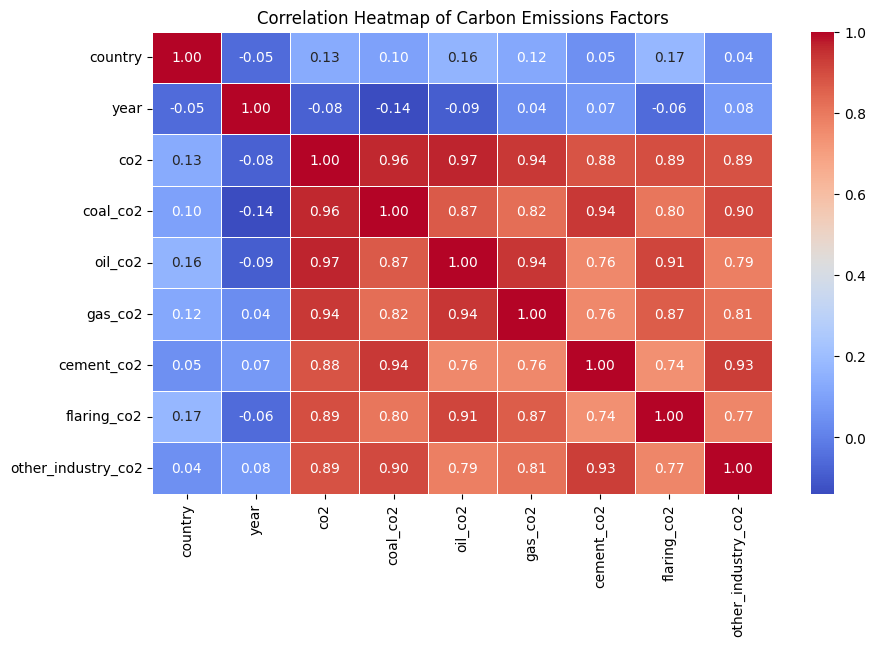

In [54]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Carbon Emissions Factors")
plt.show()

**CO₂ Emissions Over Time**

<ipython-input-55-62efc1b4dc9e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="year", y="co2", estimator="mean", ci=None)


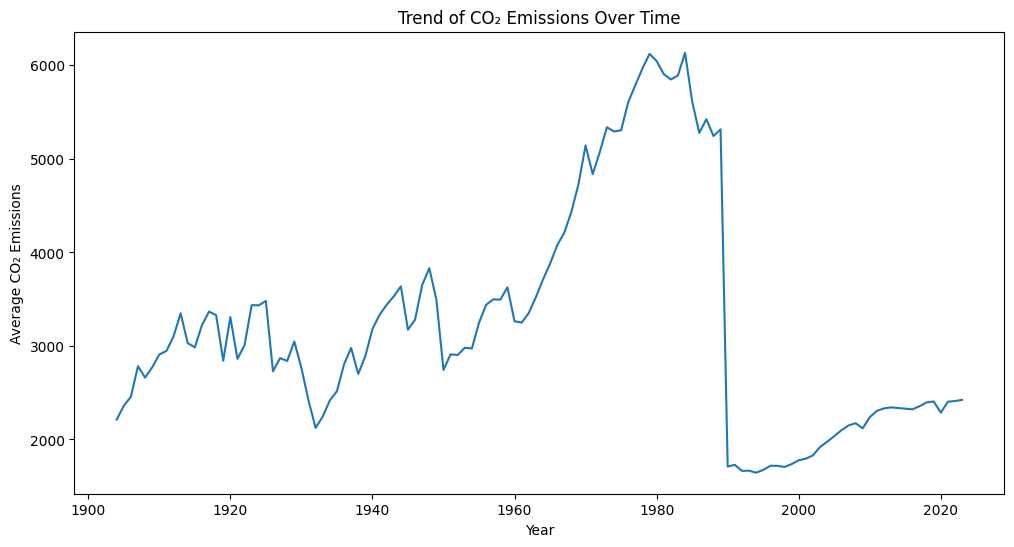

In [55]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="year", y="co2", estimator="mean", ci=None)
plt.xlabel("Year")
plt.ylabel("Average CO₂ Emissions")
plt.title("Trend of CO₂ Emissions Over Time")
plt.show()

**Distribution of CO₂ Emissions**

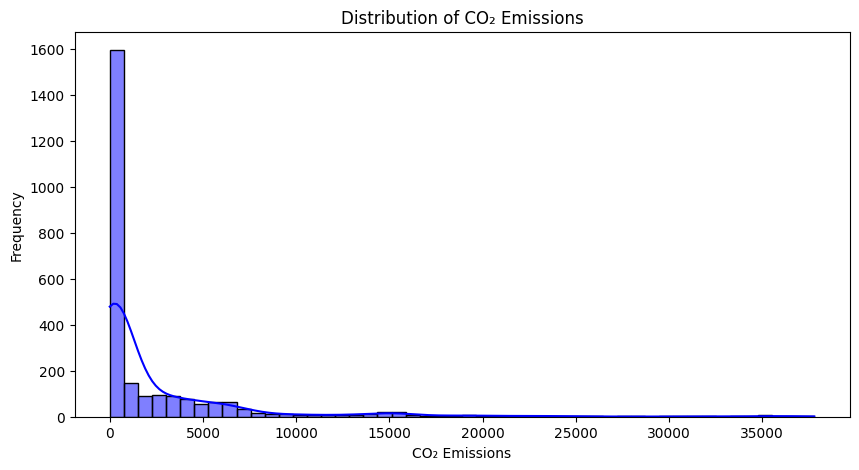

In [56]:
plt.figure(figsize=(10, 5))
sns.histplot(df['co2'], bins=50, kde=True, color='blue')
plt.title("Distribution of CO₂ Emissions")
plt.xlabel("CO₂ Emissions")
plt.ylabel("Frequency")
plt.show()

**Boxplot of CO₂ Emissions by Energy Source**

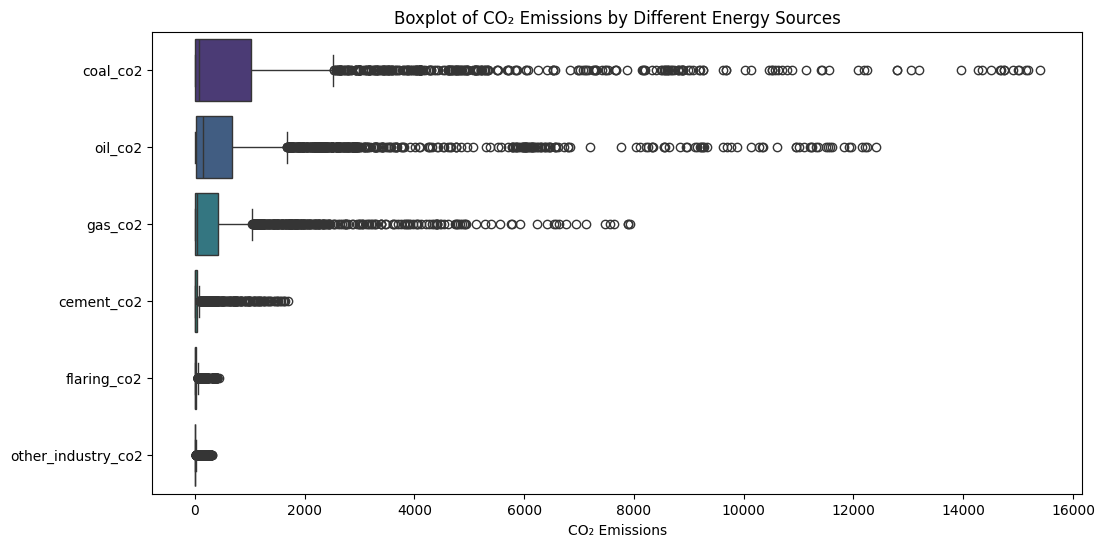

In [57]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'flaring_co2', 'other_industry_co2']], orient='h', palette='viridis')
plt.title("Boxplot of CO₂ Emissions by Different Energy Sources")
plt.xlabel("CO₂ Emissions")
plt.show()

**Pairplot for Feature Relationships**

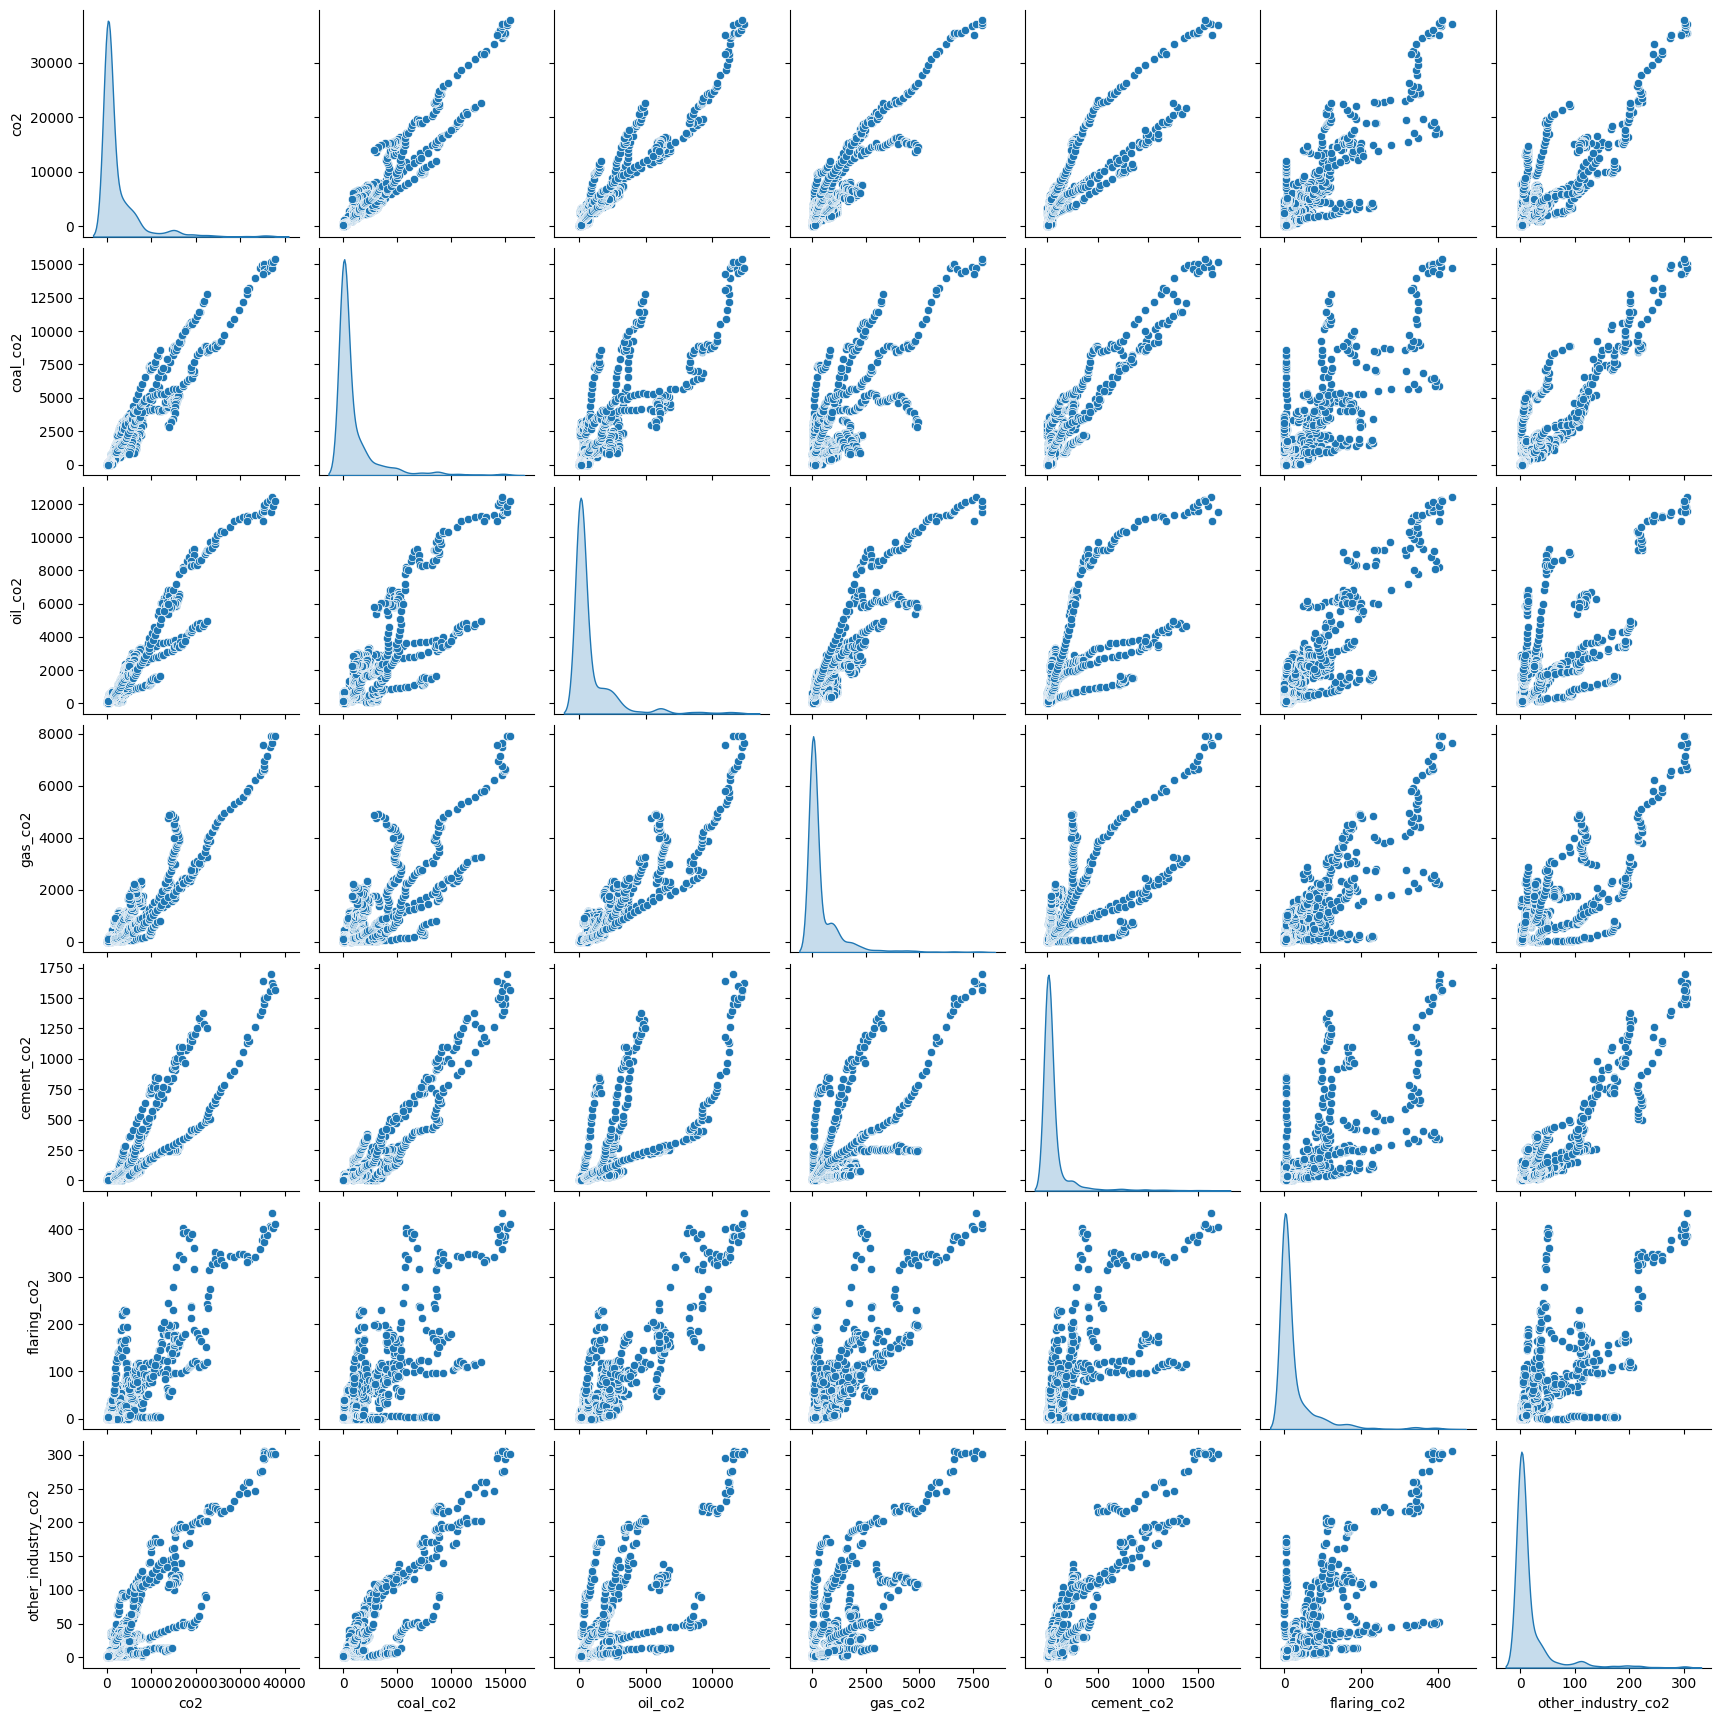

In [58]:
sns.pairplot(df[['co2', 'coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'flaring_co2', 'other_industry_co2']], diag_kind='kde')
plt.show()

**Feature Importance (XGBoost)**

<ipython-input-59-ab76381fdd6b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_names, palette="coolwarm")


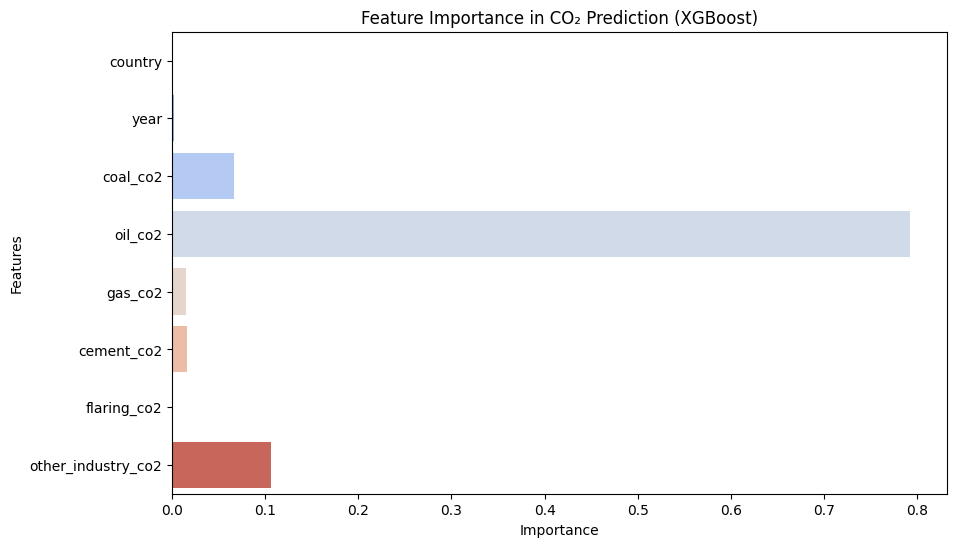

In [59]:
feature_importance = xgb_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names, palette="coolwarm")
plt.title("Feature Importance in CO₂ Prediction (XGBoost)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

**Prediction vs. Actual Visualization**

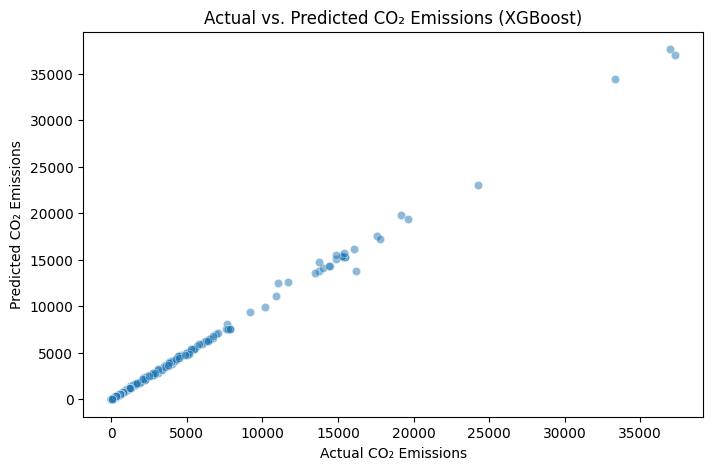

In [60]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.5)
plt.xlabel("Actual CO₂ Emissions")
plt.ylabel("Predicted CO₂ Emissions")
plt.title("Actual vs. Predicted CO₂ Emissions (XGBoost)")
plt.show()

**Saving Predictions**

In [61]:
df_results = pd.DataFrame({"Actual CO₂": y_test, "Predicted CO₂": y_pred_xgb})
df_results.to_csv("carbon_footprint_predictions.csv", index=False)